In [1]:
from Experiment import Experimenting, DatasetConfig, DSC, DSCLoss, CE, Accuracy, Precision, Recall, IoU, NewTrainConfig

In [2]:
import torch
from torchvision import datasets, transforms
from torchio import RandomFlip, Resize, RandomBiasField, RandomGamma


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\USER\OneDrive\Documents\Python\Kaggle\venv\lib\site-packages\pydicom\pixels\utils.py", line 1274, in _passes_version_check
    module = importlib.import_module(package_name, "__version__")
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'libjpeg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 440, in form

In [3]:
torch.manual_seed(0)

In [4]:
datasetConfig = DatasetConfig(
    window_center=400,
    window_width=1000,
    device="cuda",
    compose= {
        "train": transforms.Compose([
            # reshape to (1, -1, -1, -1)
            # transform ndarray to tensor
            # normalize to [0, 1]
            transforms.Lambda(lambda x: torch.tensor(x).unsqueeze(0).float()),
            Resize((128)),
            RandomFlip(axes=("LPR"), p=.5),
        ]),
        "val": transforms.Compose([
            # reshape to (1, -1, -1, -1)
            # transform ndarray to tensor
            transforms.Lambda(lambda x: torch.tensor(x).unsqueeze(0).float()),
            Resize((128)),
        ]),
        "test": transforms.Compose([
            # reshape to (1, -1, -1, -1)
            # transform ndarray to tensor
            transforms.Lambda(lambda x: torch.tensor(x).unsqueeze(0).float()),
            Resize((128)),
        ]),
    }
)
    

In [5]:
from Experiment import logger

In [6]:
experimentOne = Experimenting[torch.tensor, torch.tensor]("before_i_die", "split.json", datasetConfig,[DSCLoss(), CE()], [DSC(), CE(), Accuracy(), Precision(), Recall(), IoU()], 3, logger) 

[INFO][main.DataEngine][transform to npz]: Data already transformed to npz 
[INFO][main][initialize data engine]: DataEngine initialized with meta data from split.json 
[INFO][main.Experimenting.before_i_die][initialize experiment]: Experimenting initialized. 


In [7]:
from Experiment import MedNeXt

In [8]:
# experimentOne.add_trainer(MedNeXt, "mednext_1_4", load_model_path="Experimenting/test/MedNeXt/mednext_1_4/model_4.pth", num_input_channels=1, model_id="S", )
experimentOne.add_trainer(MedNeXt, "mednext_first", num_input_channels=1, model_id="S", )

[INFO][main.Experimenting.before_i_die][add trainer]: Added MedNeXt to the experiment. 


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
# just test a program
experimentOne.run(batch_size=1, num_workers=0, train_config=NewTrainConfig(epoch=40, weight_save_period=1, accumulation_steps=16, lr=1e-4))

[INFO][main.Experimenting.before_i_die][run experiment]: Experimenting started. 
[INFO][main.DataEngine][get data]: Getting data from train set 
[INFO][main.DataEngine][create dataloader]: Creating dataloader for train set 
[INFO][main.DataEngine][get data]: Getting data from val set 
[INFO][main.DataEngine][create dataloader]: Creating dataloader for val set 
[INFO][main.DataEngine][get data]: Getting data from test set 
[INFO][main.DataEngine][create dataloader]: Creating dataloader for test set 
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: rqobist (superaipunn). Use `wandb login --relogin` to force relogin


  0%|          | 0/41 [00:00<?, ?it/s]c:\Users\USER\OneDrive\Documents\Python\Kaggle\dicom\Experiment\DataEngine\Engine\dataset.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.float32, device=self.device)
c:\Users\USER\OneDrive\Documents\Python\Kaggle\dicom\Experiment\DataEngine\Engine\dataset.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label, dtype=torch.long, device=self.device)
  2%|▏         | 1/41 [00:19<13:17, 19.94s/it]


KeyboardInterrupt: 

: 

In [ ]:
test_dataload = experimentOne.data_engine.get_dataloader("train", batch_size=1)

[INFO][main.DataEngine][get data]: Getting data from train set 
[INFO][main.DataEngine][create dataloader]: Creating dataloader for train set 


# Inference Part

In [ ]:
data = next(iter(test_dataload))

c:\Users\USER\OneDrive\Documents\Python\Kaggle\dicom\Experiment\DataEngine\Engine\dataset.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.float32, device=self.device)
c:\Users\USER\OneDrive\Documents\Python\Kaggle\dicom\Experiment\DataEngine\Engine\dataset.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label, dtype=torch.long, device=self.device)


In [ ]:
len(data)

3

In [ ]:
data[0].shape, data[1].shape, data[2].shape

(torch.Size([1]),
 torch.Size([1, 1, 128, 128, 128]),
 torch.Size([1, 1, 128, 128, 128]))

In [ ]:
output = experimentOne.train_method[0].infer(data[1].to(experimentOne.device))

In [ ]:
output.shape

torch.Size([1, 3, 128, 128, 128])

In [ ]:
# output is B, C, H, W, D. softmax is applied to C

output = torch.argmax(output, dim=1)
output.shape

torch.Size([1, 128, 128, 128])

In [ ]:
target

NameError: name 'target' is not defined

In [ ]:
import matplotlib.pyplot as plt
# subplot

In [ ]:
from Experiment import get_array_by_subplot, write_video, VisualBlock, SubplotBlock, windowing
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import torchio as tio

In [ ]:
# exaple of viz

# for name in sample_data:
#     windowed_to_write_video = []
#     trans_to_write_video = []
    
#     img = sitk.ReadImage("dataset/data/"+name)
#     mask = sitk.ReadImage("dataset/label/"+name.replace("img", "label"))

#     windowed_img = windowing(sitk.GetArrayFromImage(img), 400, 500)
    
#     img_transformed = transform(np.expand_dims(windowed_img, axis=0))
#     mask_transformed = transform(np.expand_dims(sitk.GetArrayFromImage(mask), axis=0))
    
#     for idx, (frame_img, frame_mask, frame_img_win) in enumerate(zip(sitk.GetArrayFromImage(img), sitk.GetArrayFromImage(mask), windowed_img)):
#         subplotBlock_ori_win = SubplotBlock(
#             title=f"frame {idx}",
#             layout=(1, 3),
#             visual_blocks=[
#                 VisualBlock(
#                     title="img",
#                     img=frame_img
#                 ),
#                 VisualBlock(
#                     title="mask",
#                     img=frame_mask
#                 ),
#                 VisualBlock(
#                     title="img_windowed",
#                     img=frame_img_win
#                 ),
#             ]
#         )
        
        
        
#         windowed_to_write_video.append(get_array_by_subplot(subplotBlock_ori_win))
#     write_video(np.array(windowed_to_write_video), f"output/forpresent/visual_{name.split('.')[0]}_ori_win.avi")

In [ ]:
data[0].shape, data[1].shape, data[2].shape

(torch.Size([1]),
 torch.Size([1, 1, 128, 128, 128]),
 torch.Size([1, 1, 128, 128, 128]))

In [ ]:
output.shape

torch.Size([1, 128, 128, 128])

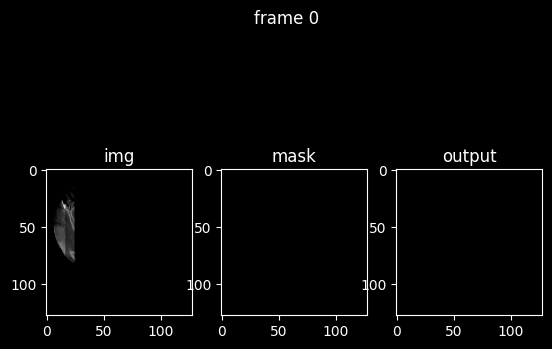

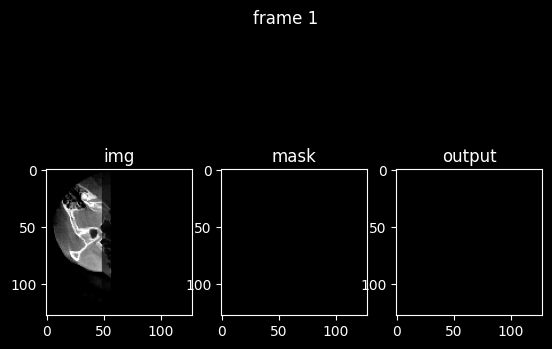

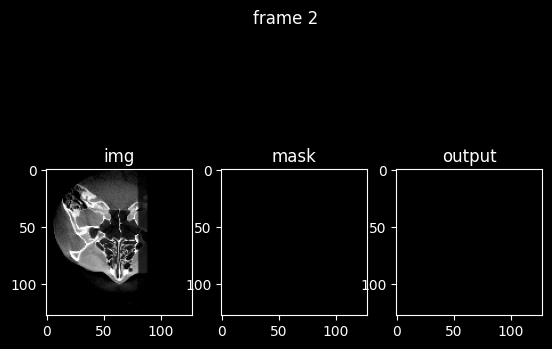

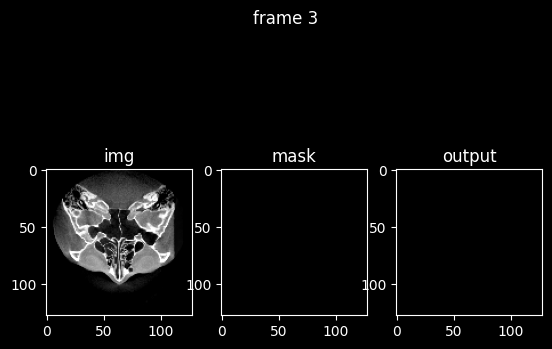

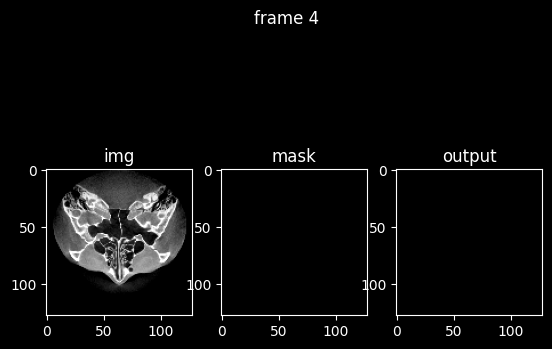

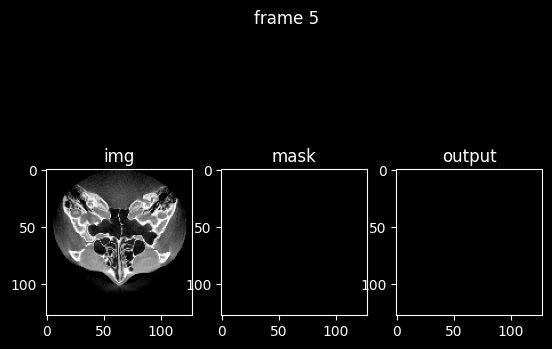

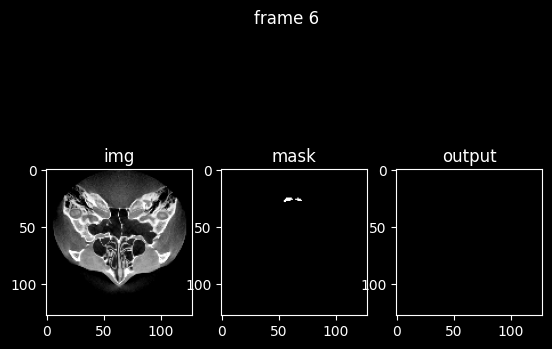

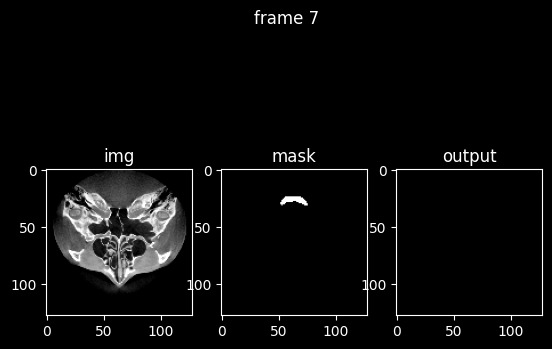

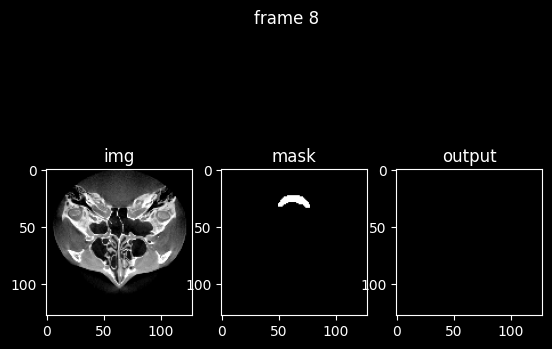

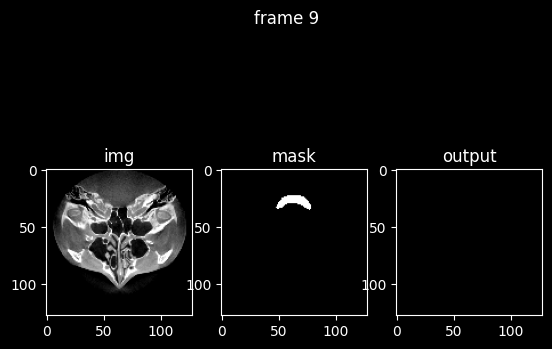

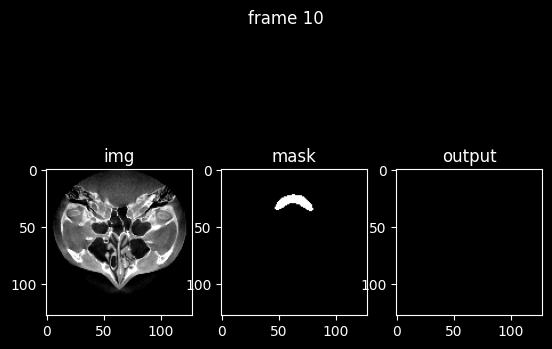

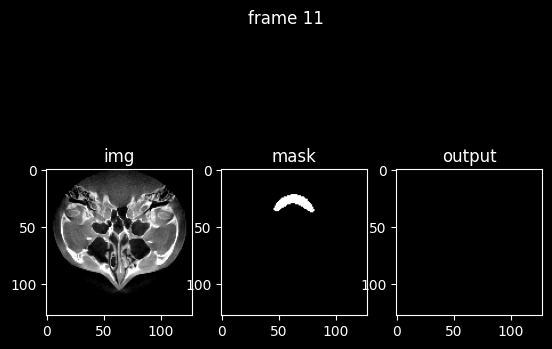

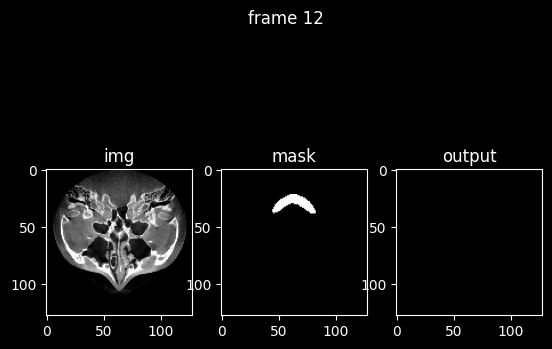

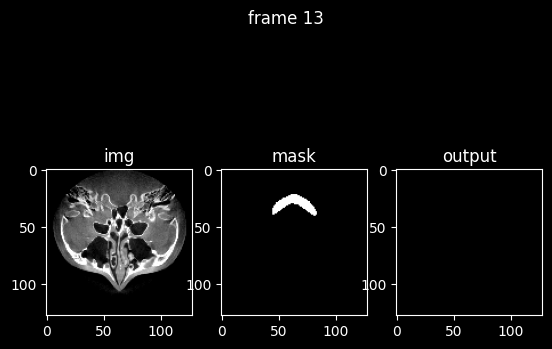

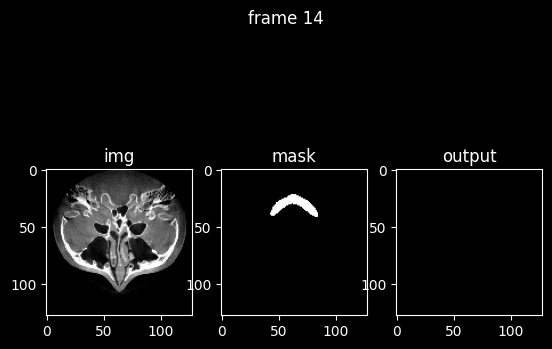

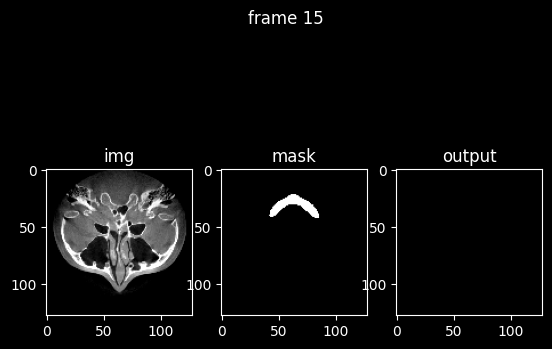

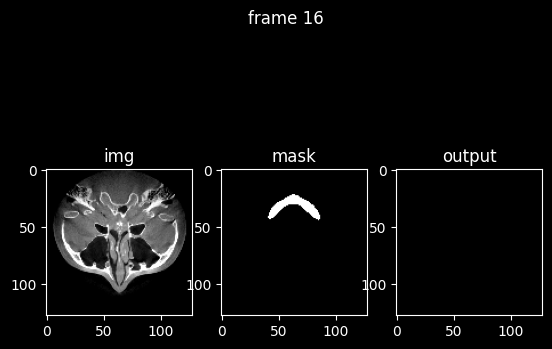

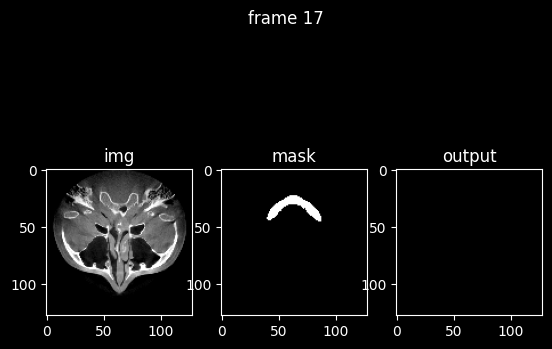

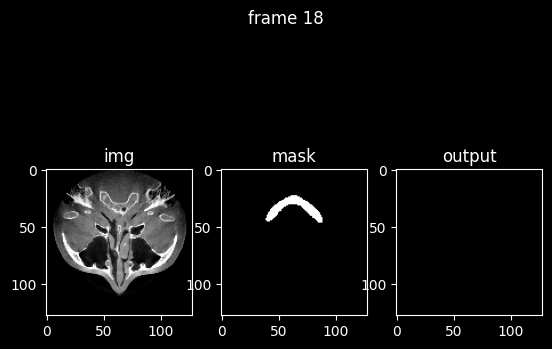

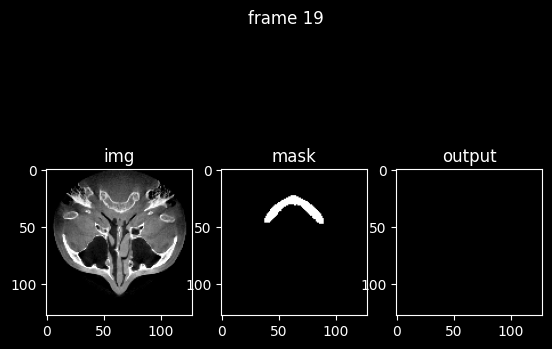

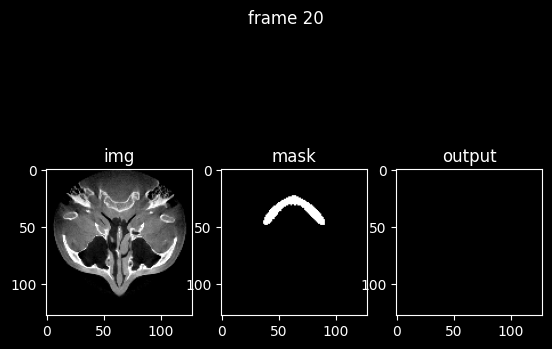

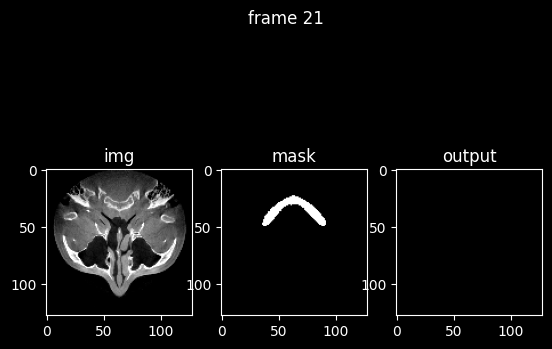

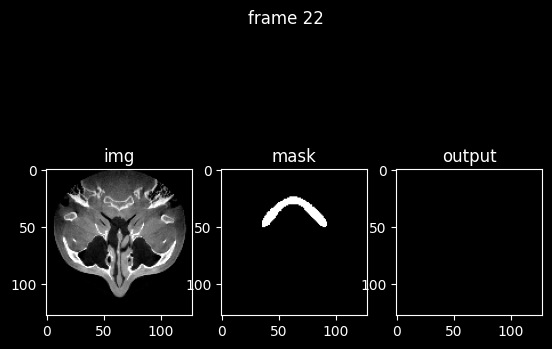

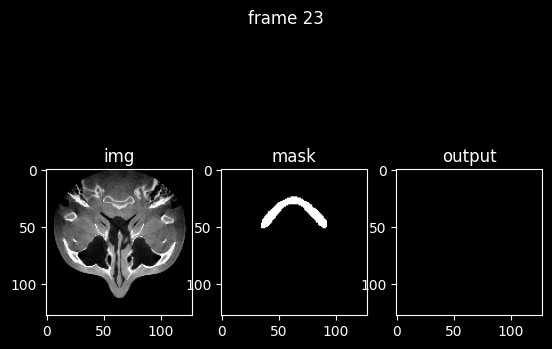

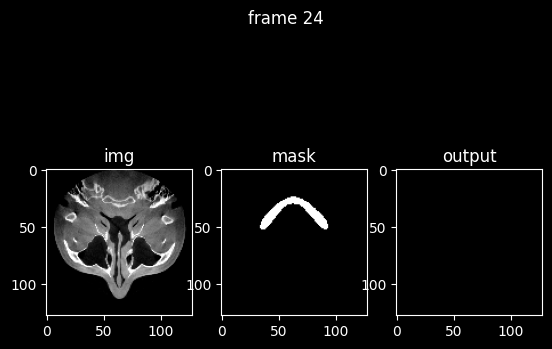

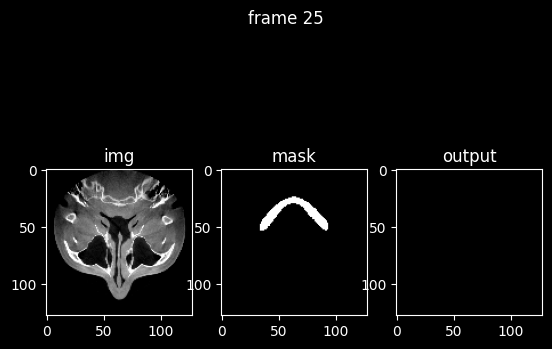

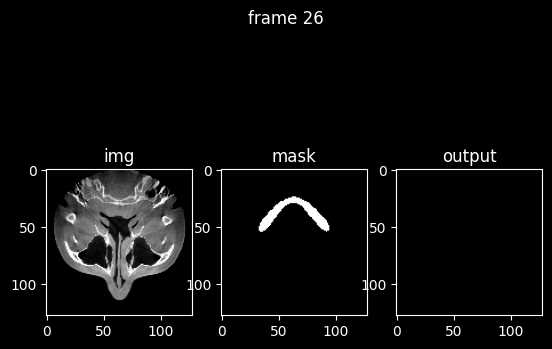

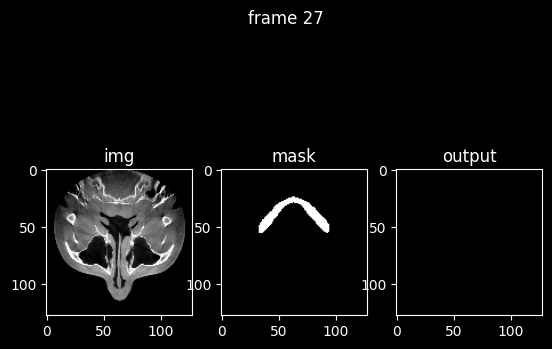

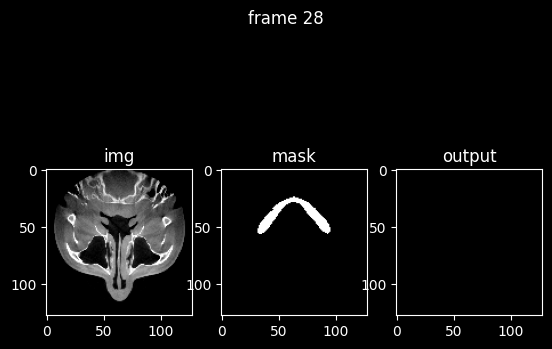

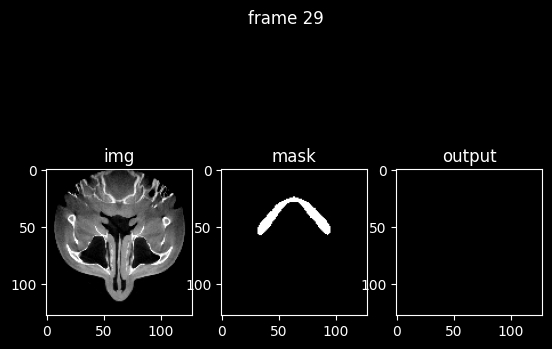

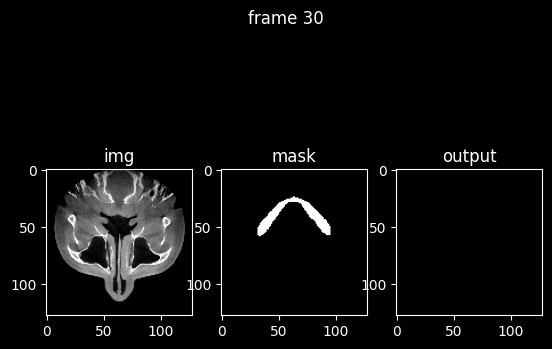

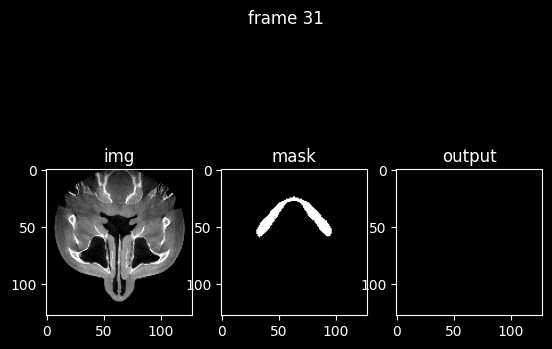

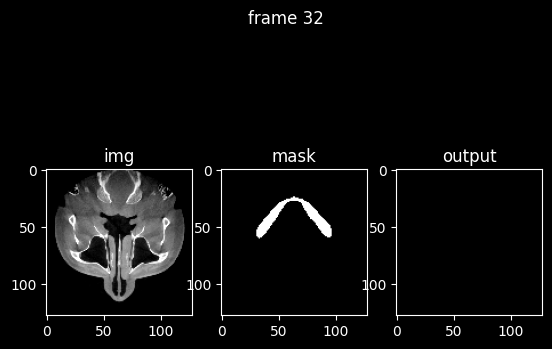

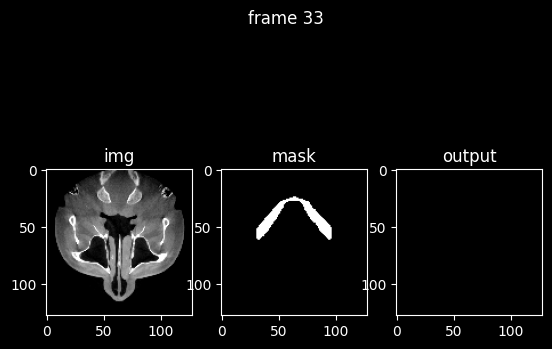

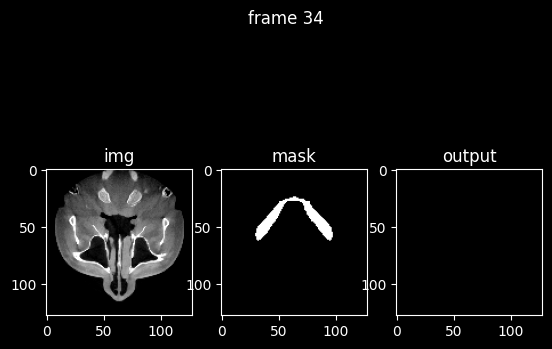

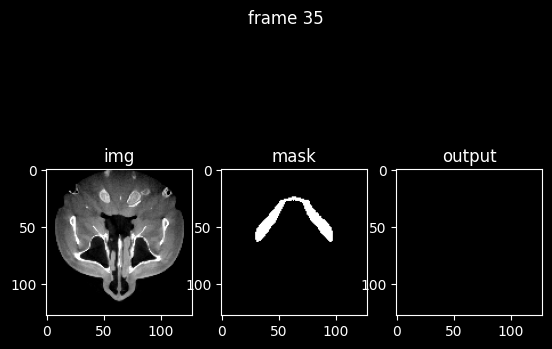

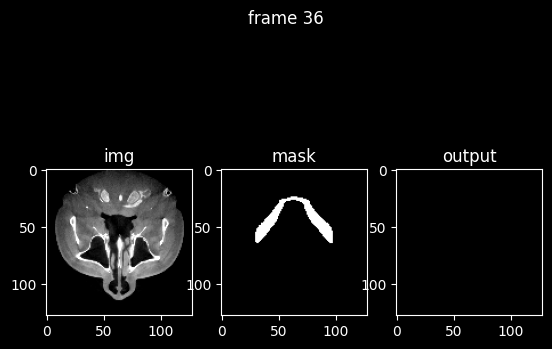

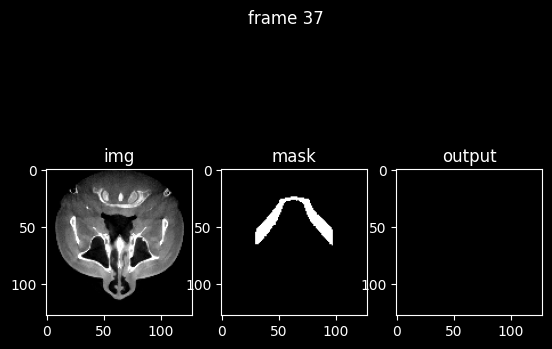

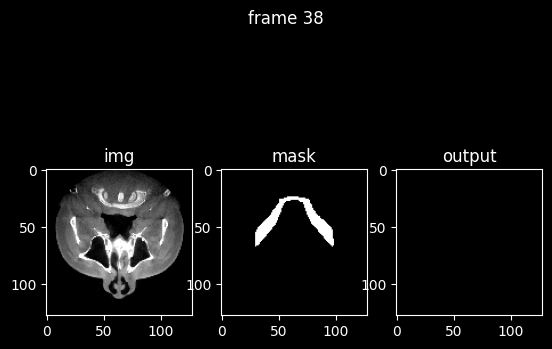

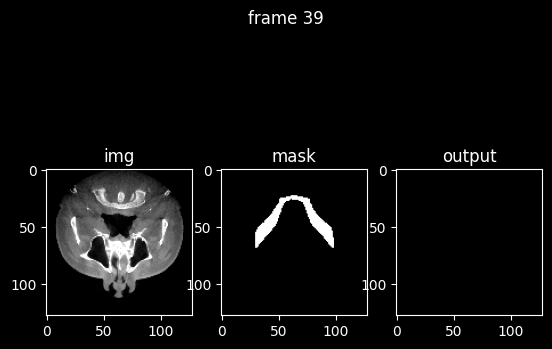

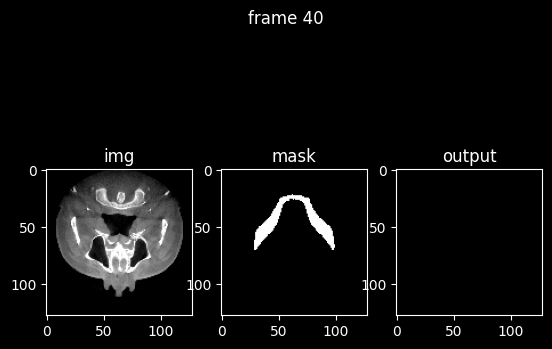

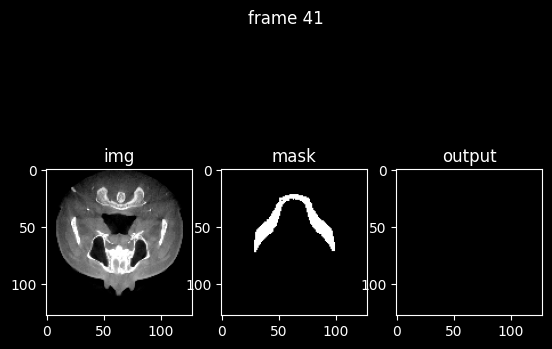

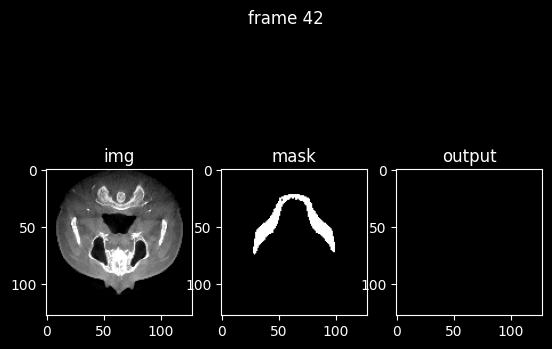

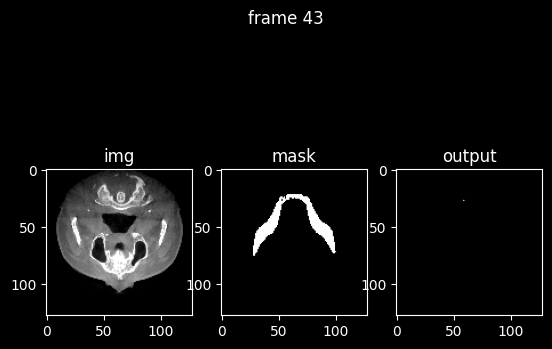

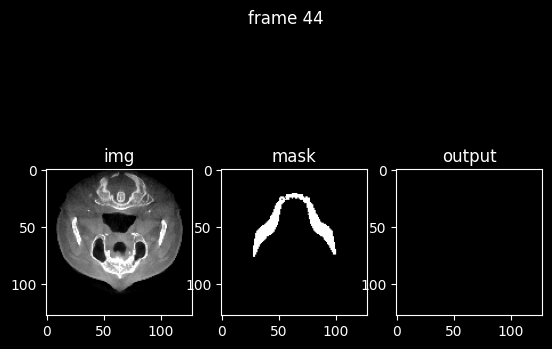

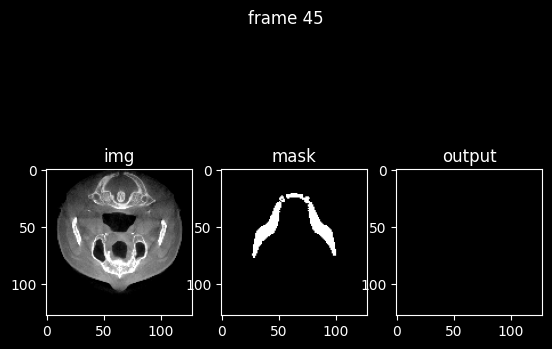

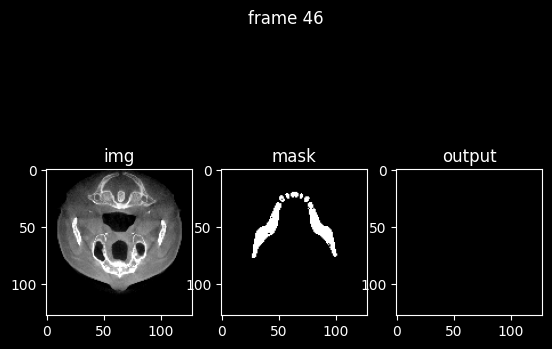

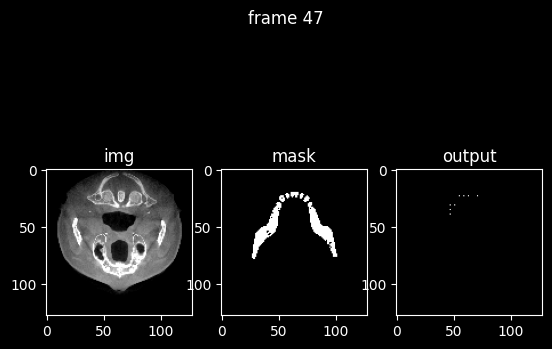

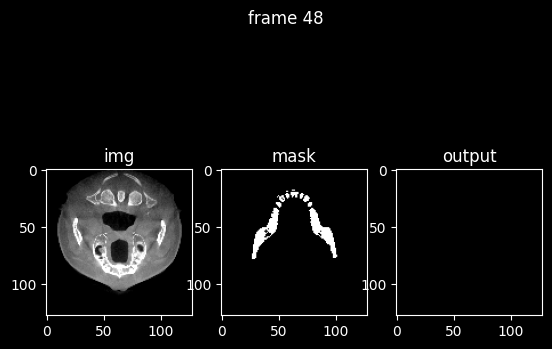

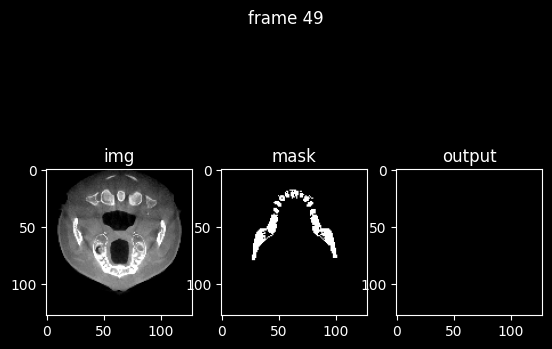

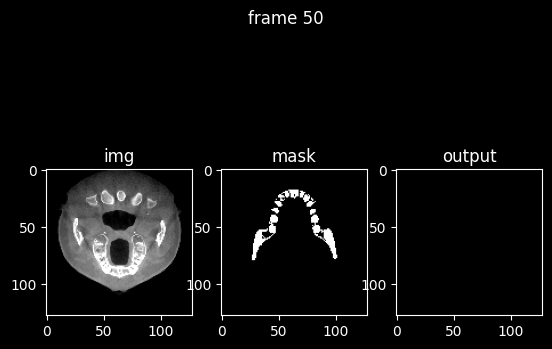

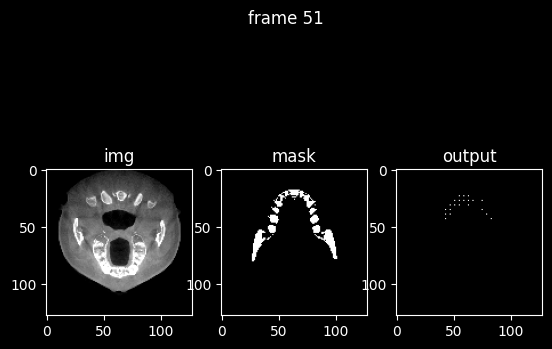

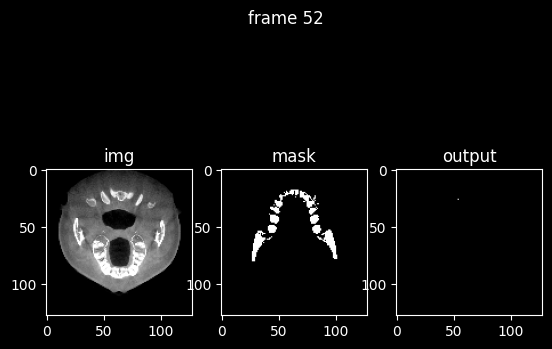

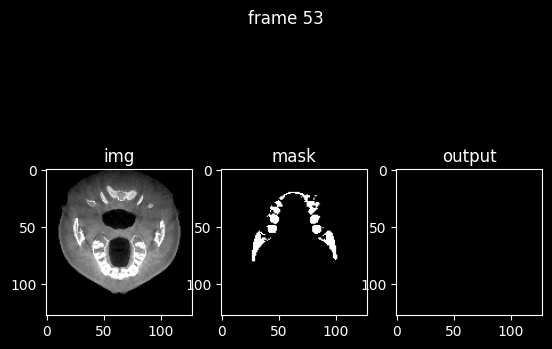

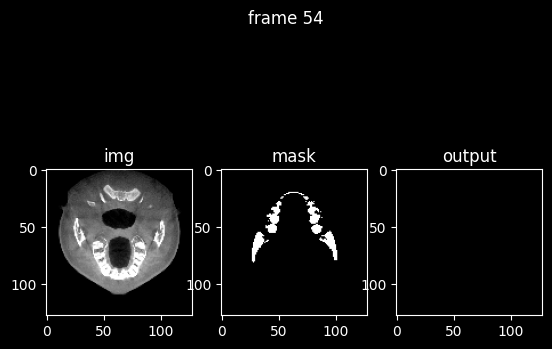

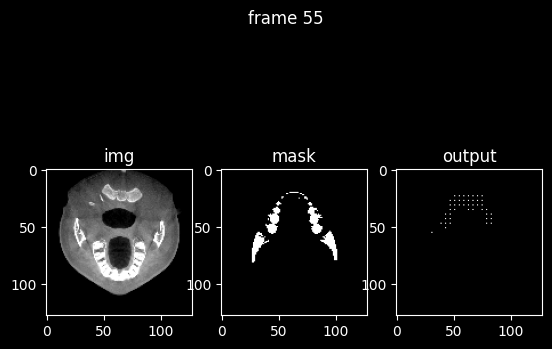

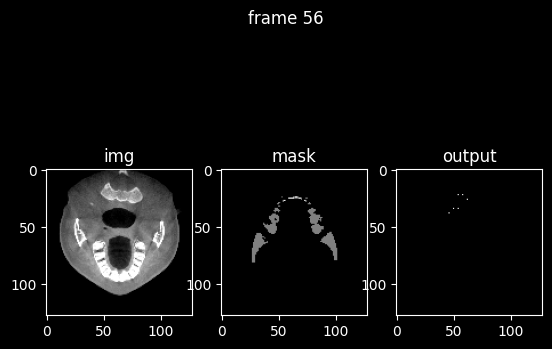

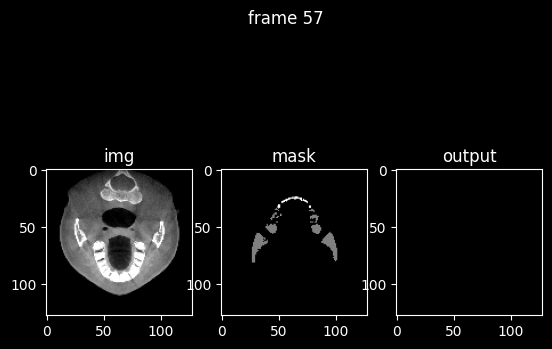

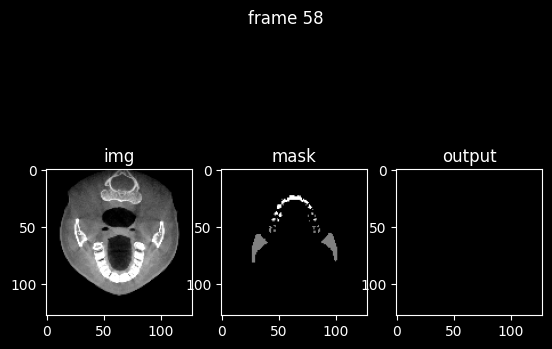

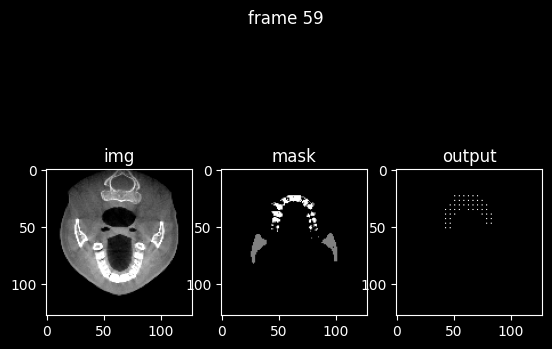

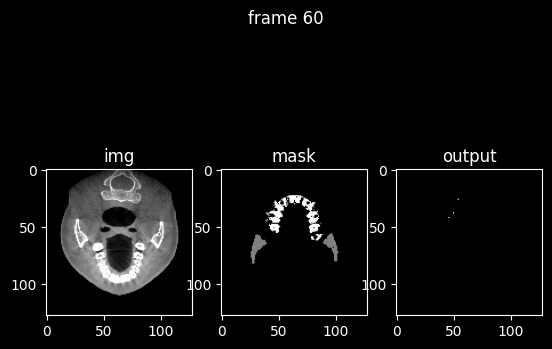

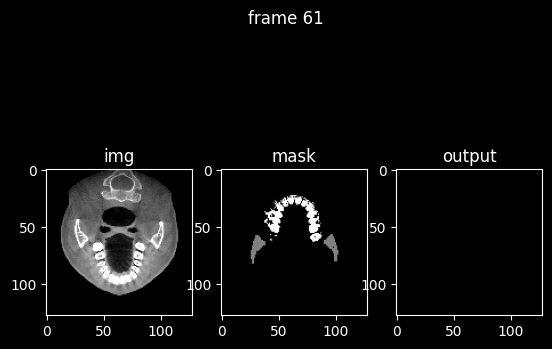

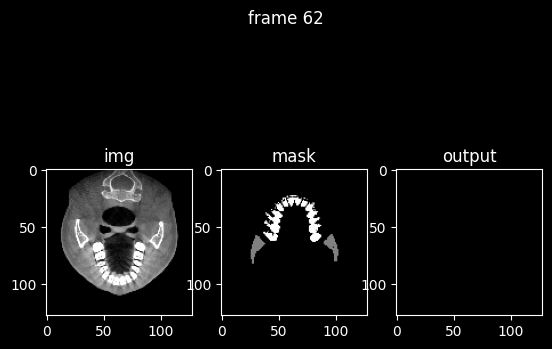

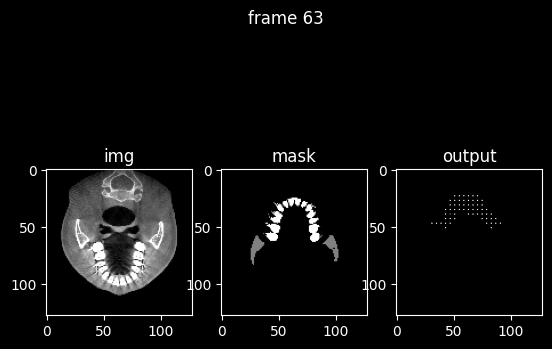

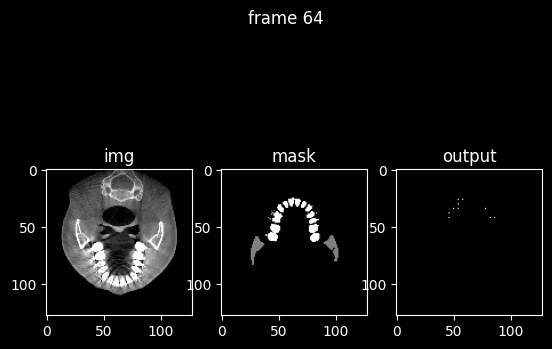

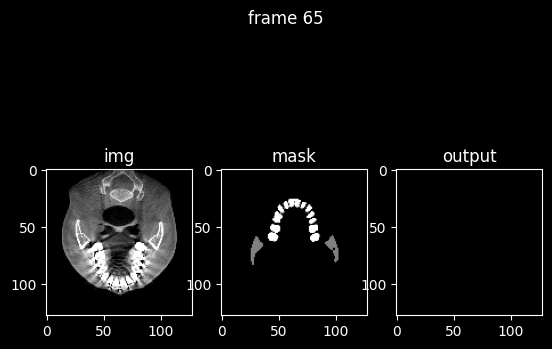

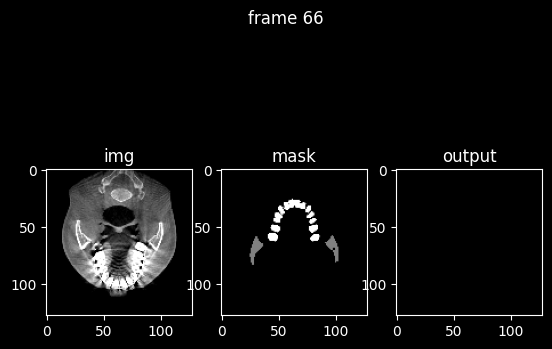

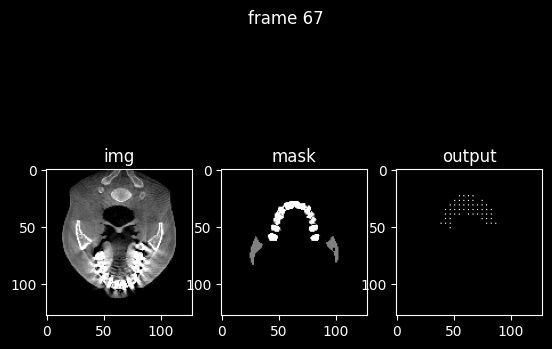

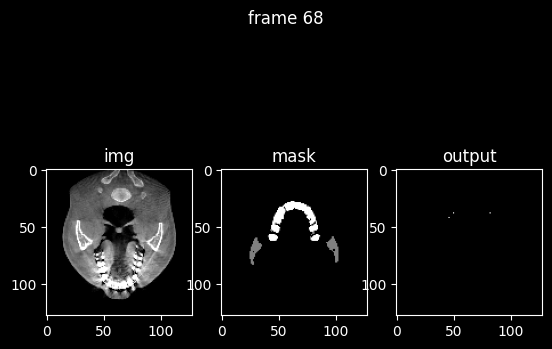

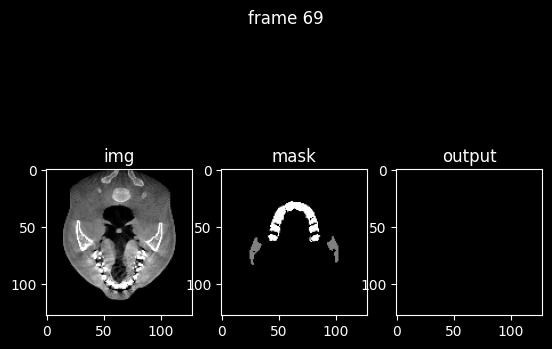

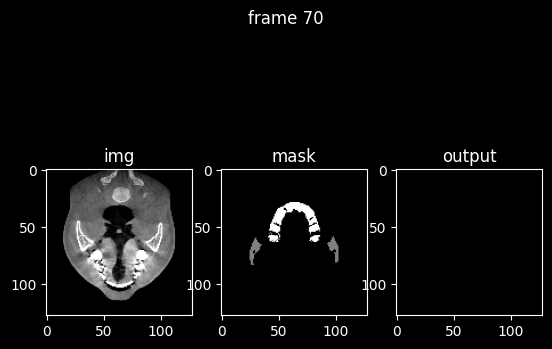

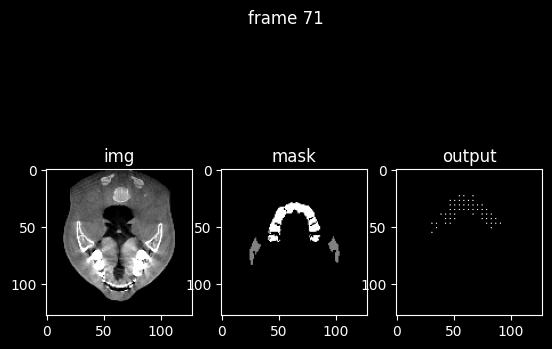

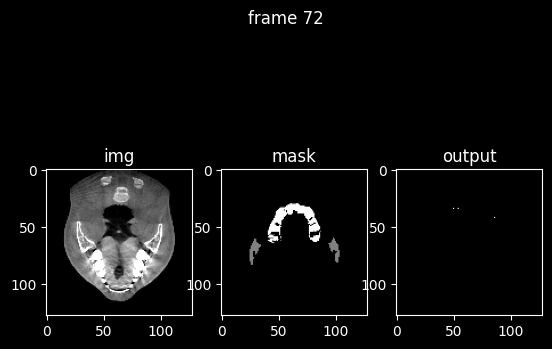

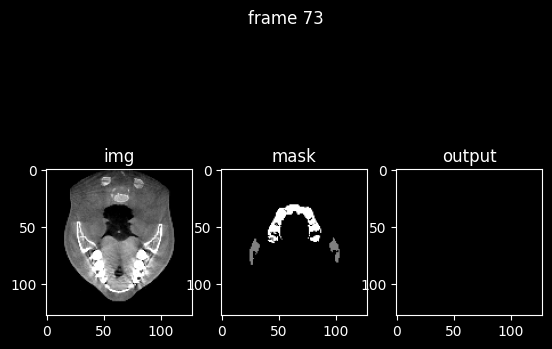

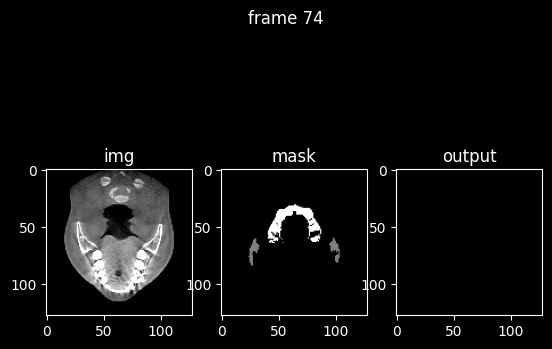

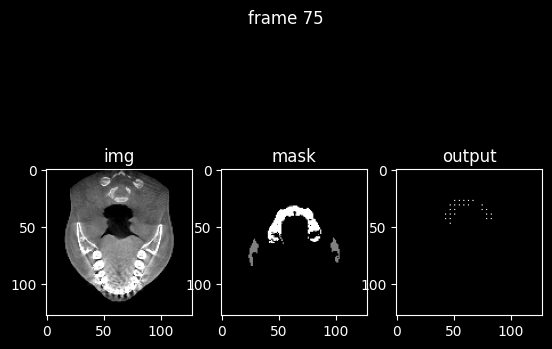

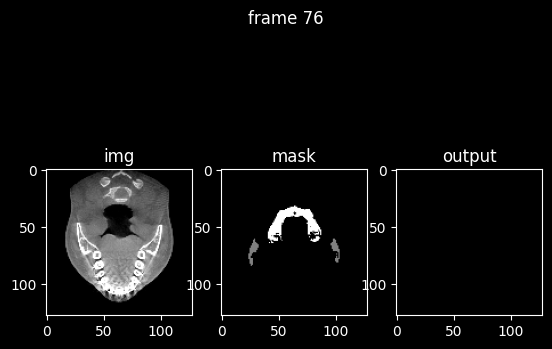

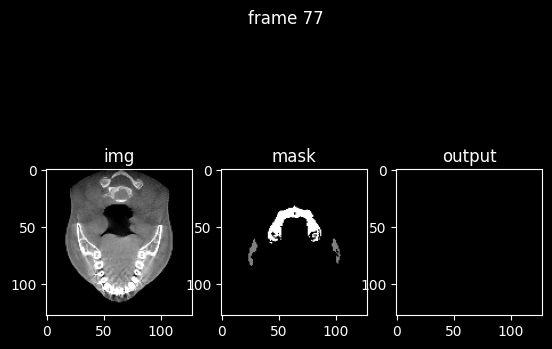

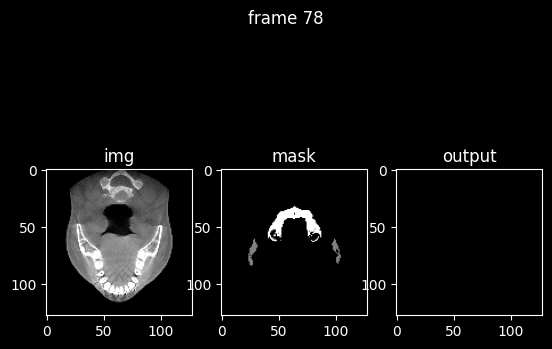

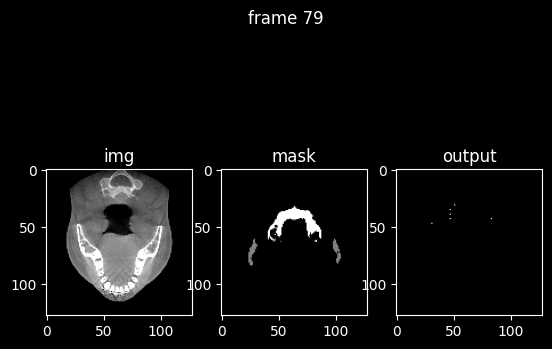

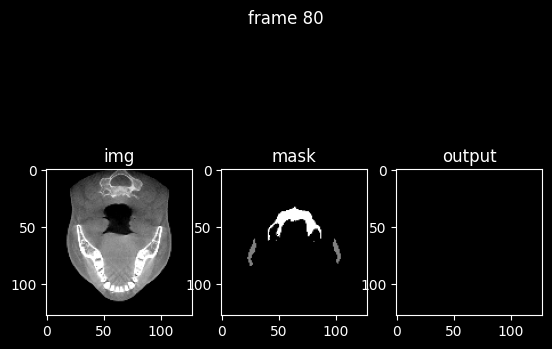

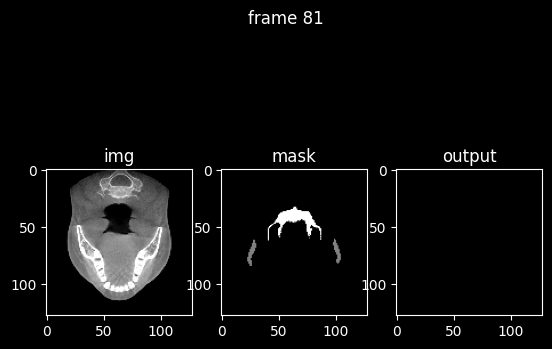

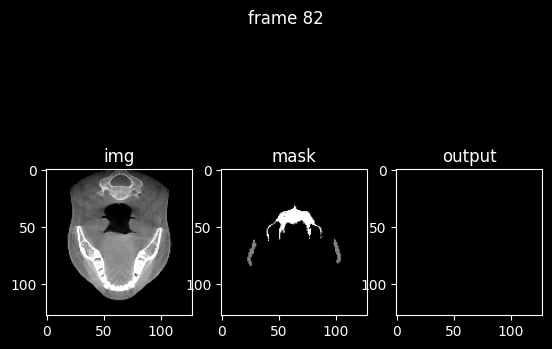

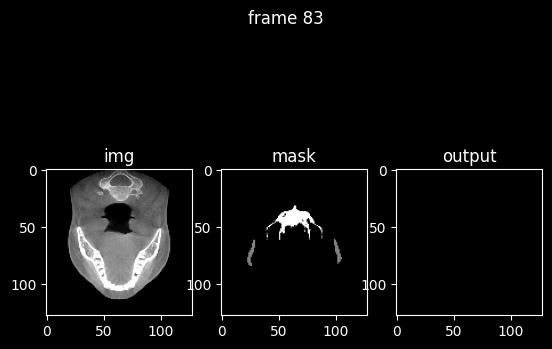

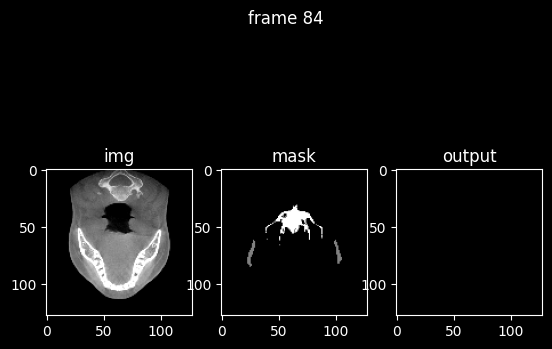

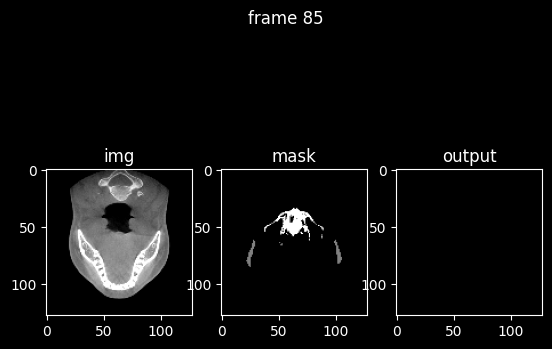

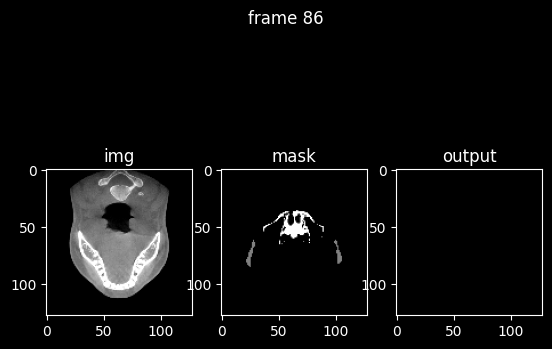

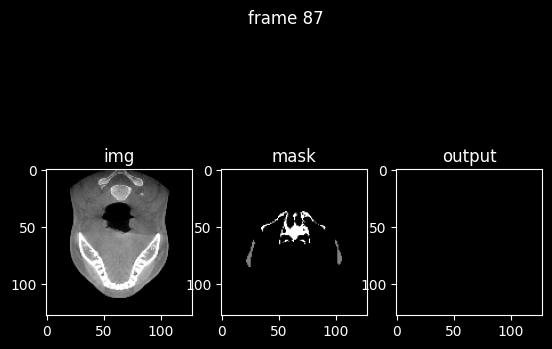

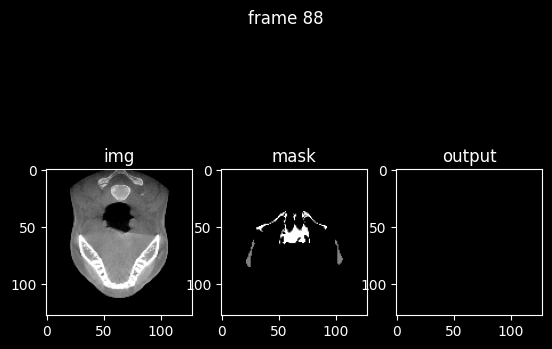

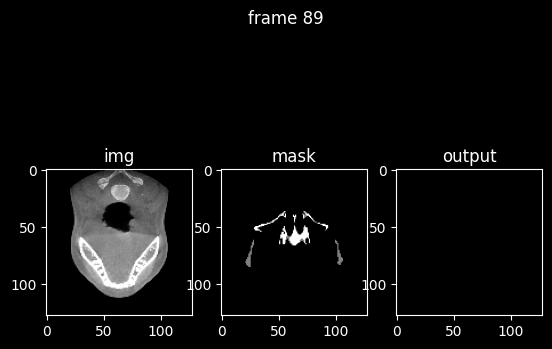

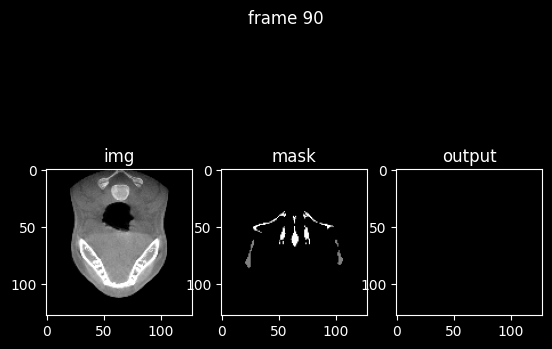

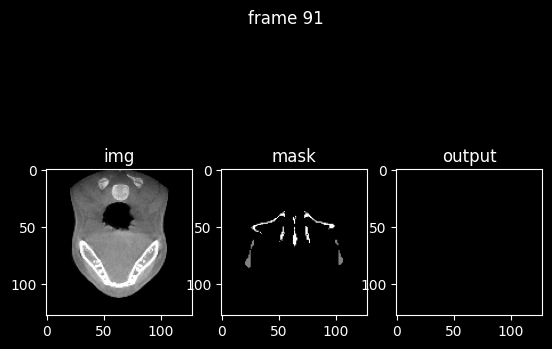

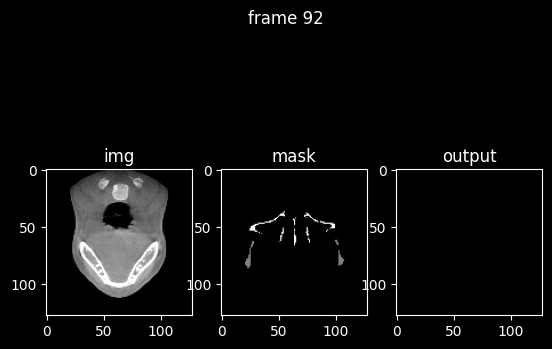

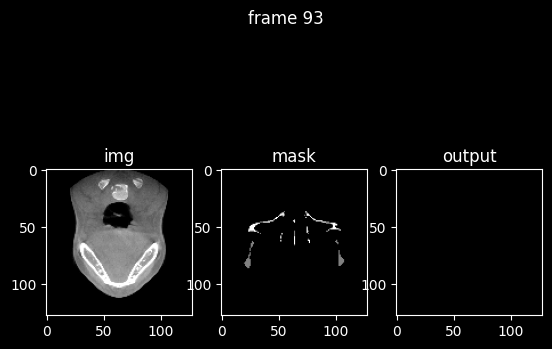

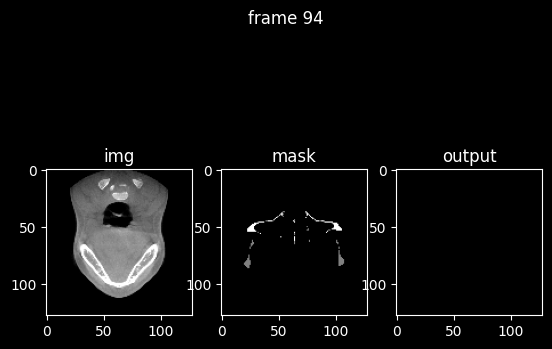

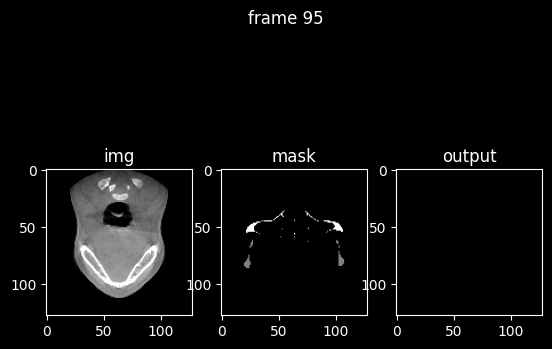

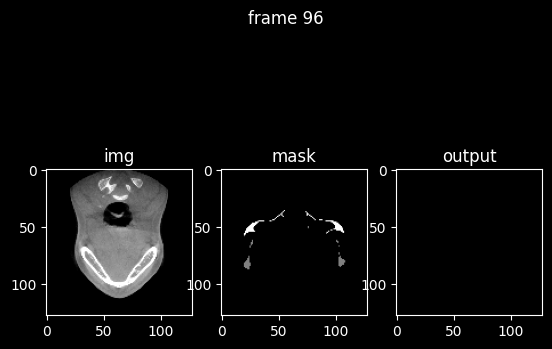

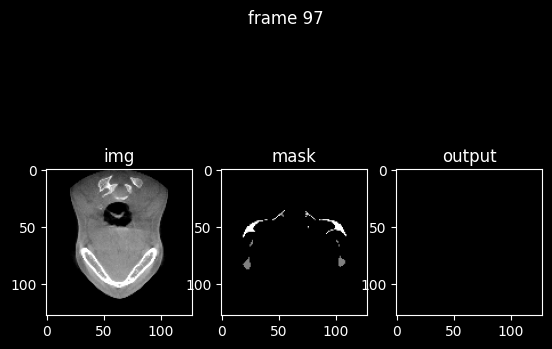

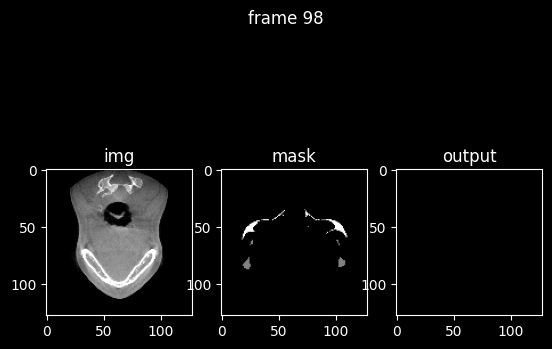

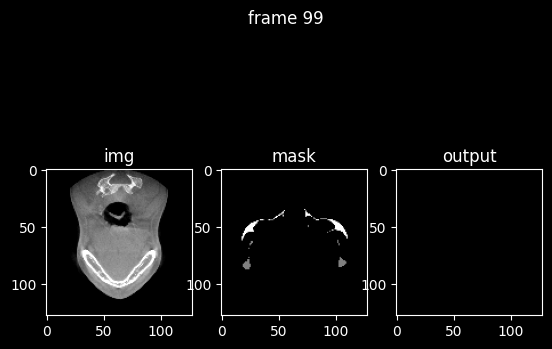

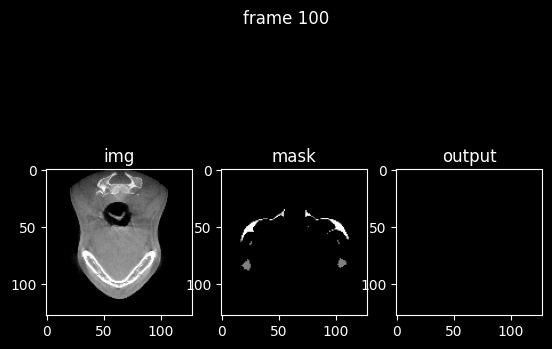

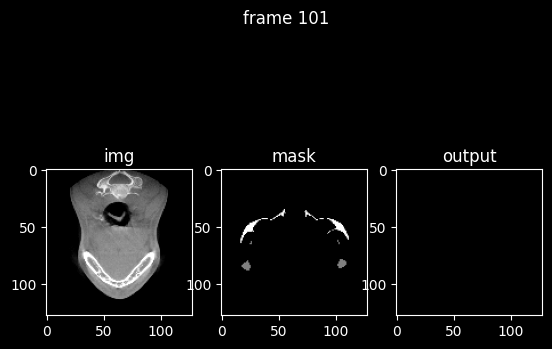

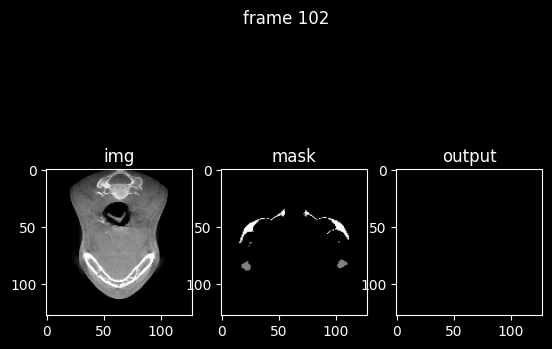

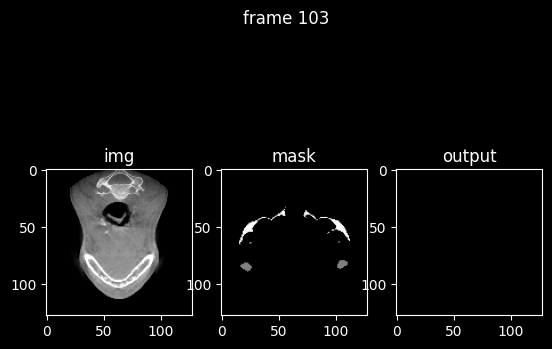

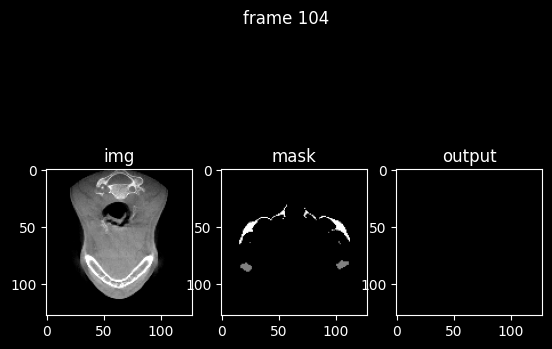

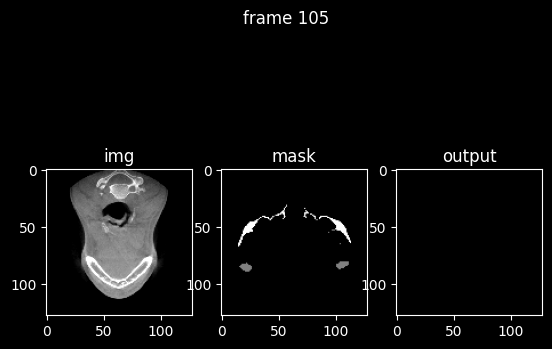

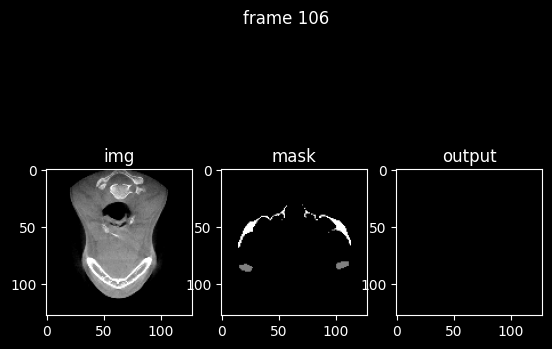

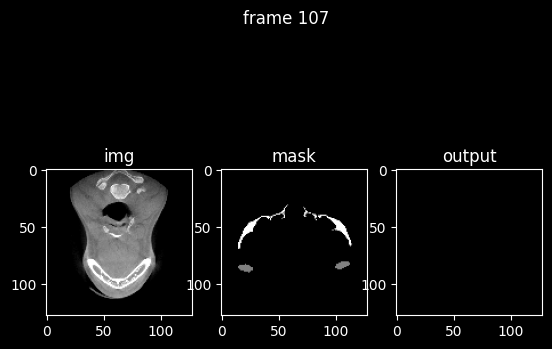

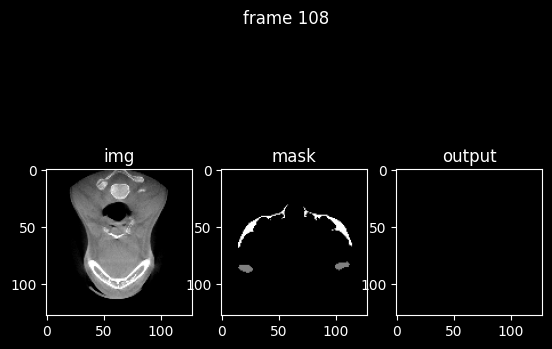

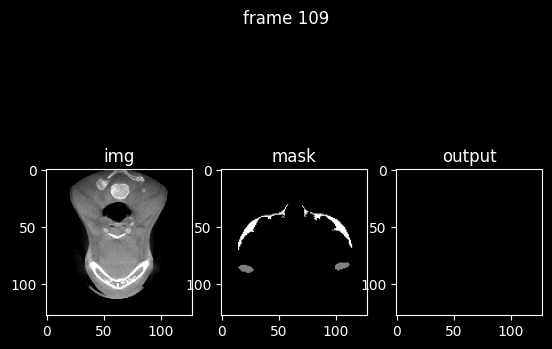

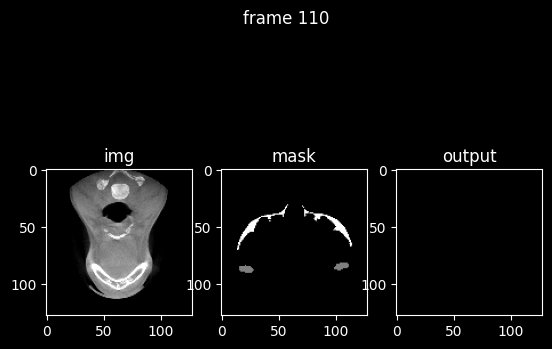

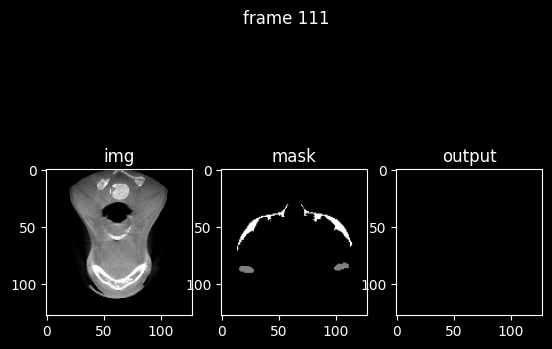

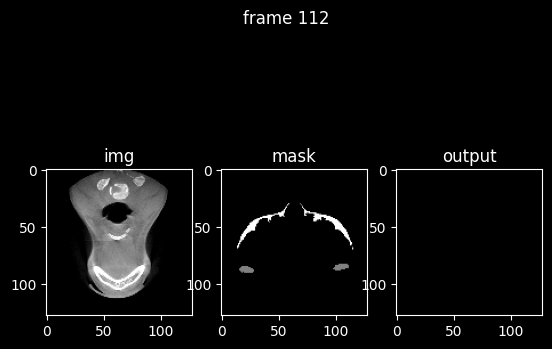

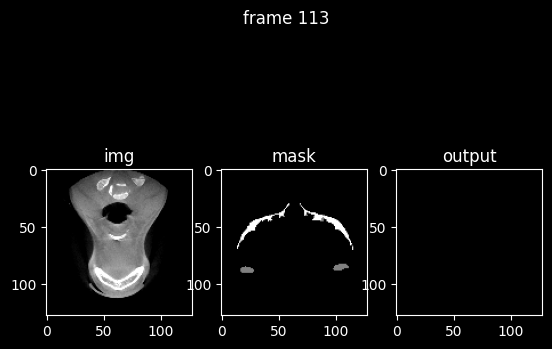

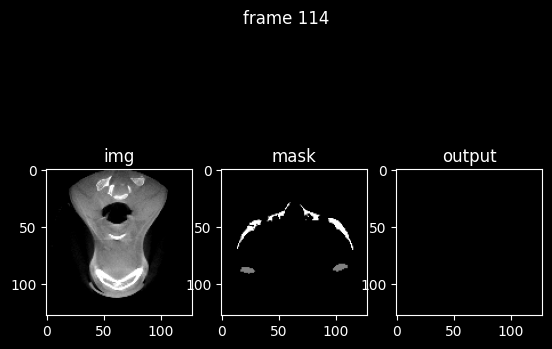

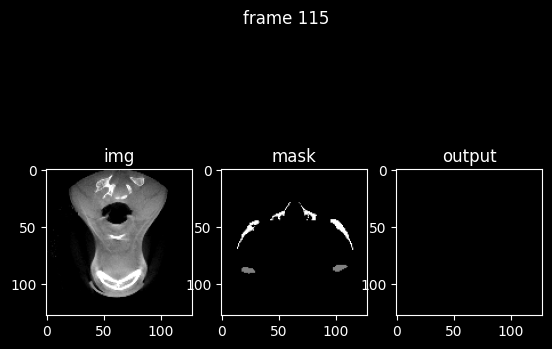

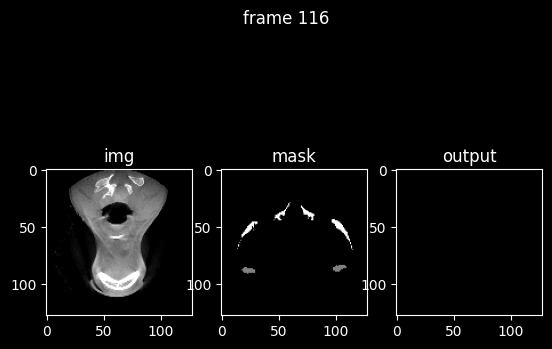

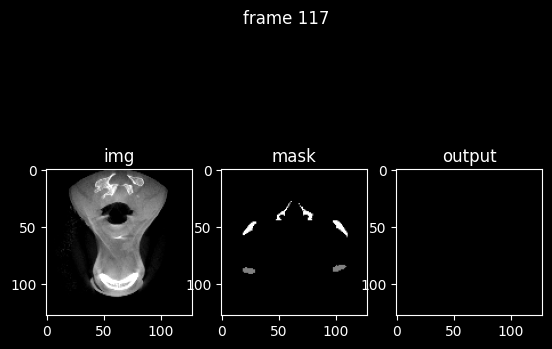

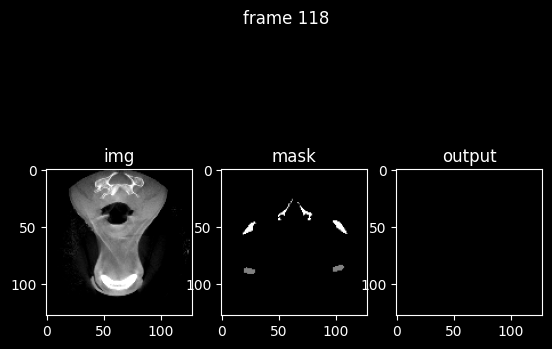

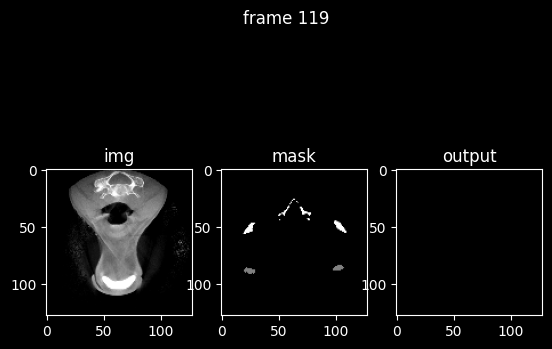

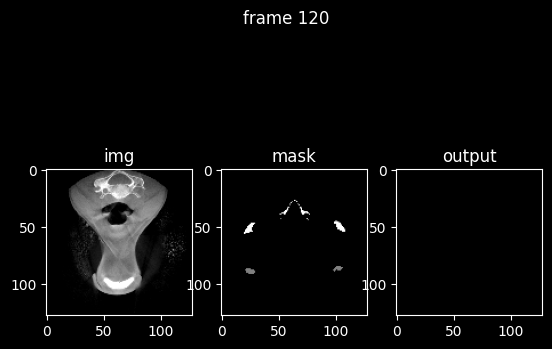

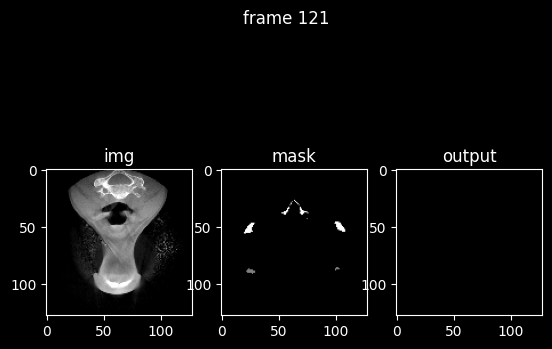

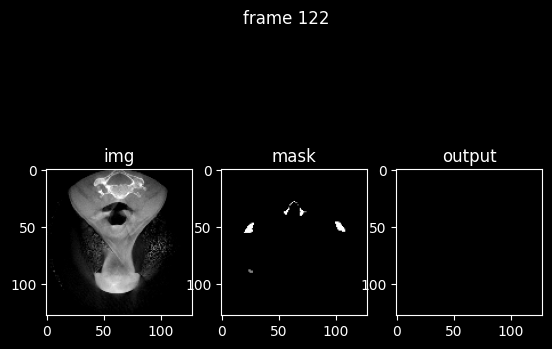

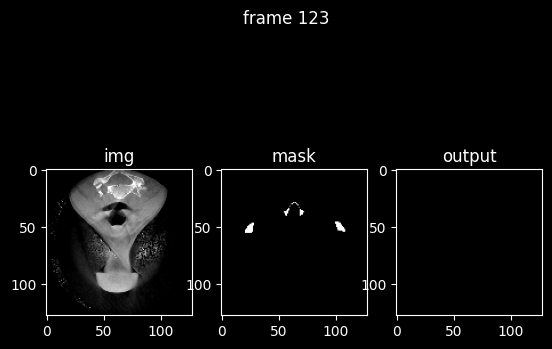

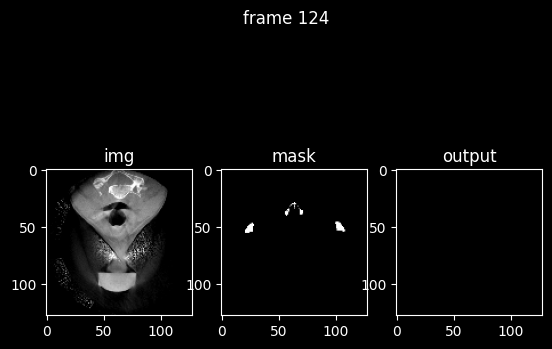

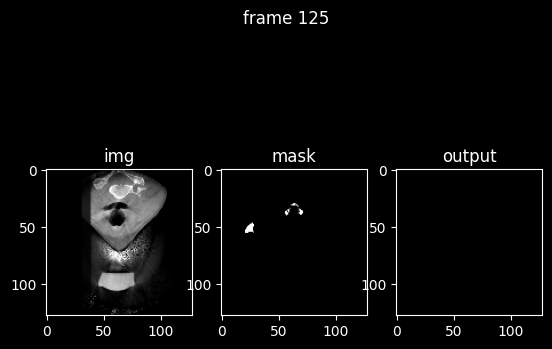

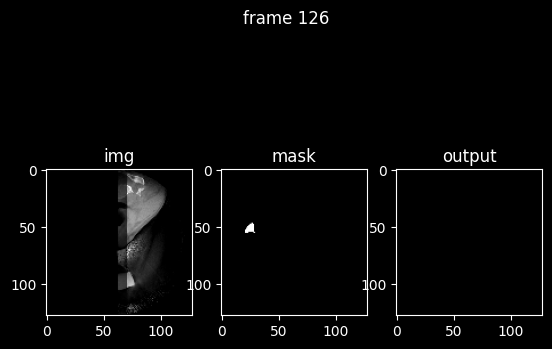

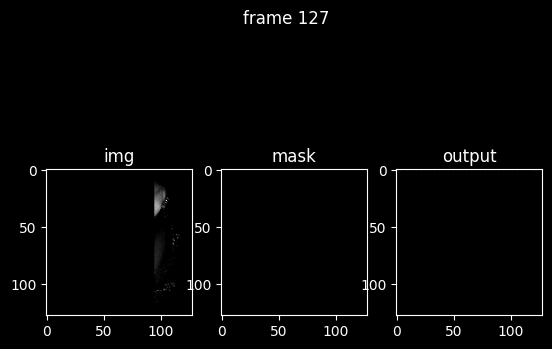

In [ ]:
# skip to for loop
to_viz = []

for idx, (frame_ori, frame_mask, frame_output) in enumerate(zip(data[1][0][0], data[2][0][0], output[0])):
    subplotBlock_ori_win = SubplotBlock(
        title=f"frame {idx}",
        layout=(1, 3),
        visual_blocks=[
            VisualBlock(
                title="img",
                img=frame_ori.cpu().numpy()
            ),
            VisualBlock(
                title="mask",
                img=frame_mask.cpu().numpy()
            ),
            VisualBlock(
                title="output",
                img=frame_output.cpu().numpy()
            ),
        ]
    )
    
    to_viz.append(get_array_by_subplot(subplotBlock_ori_win))
    
write_video(np.array(to_viz), f"output/forpresent/train_vis.avi")
    
      

In [ ]:
output[0].shape

torch.Size([128, 128, 128])

In [ ]:
data[0]

tensor([1])

In [ ]:
data[1][0][0].shape

torch.Size([128, 128, 128])

In [ ]:
result_image = sitk.GetImageFromArray(data[1][0][0].cpu().numpy().astype(np.uint8))
sitk.WriteImage(result_image, "visual_{'MedNexT'}_gt.nii.gz")


In [ ]:
result_image = sitk.GetImageFromArray(output[0].cpu().numpy().astype(np.uint8))

In [ ]:
sitk.WriteImage(result_image, "visual_{'MedNexT'}_ori_win.nii.gz")